<a href="https://colab.research.google.com/github/hemanthkumarkatta/Slashmark-ML/blob/main/Water%20Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tkinter as tk

import matplotlib.pyplot as plt
from tkinter.filedialog import askopenfilename
from tensorflow.keras.models import Sequential
import cv2
from PIL import Image, ImageTk
from tkinter import *
import tkinter

from tkinter import *
from tkinter import filedialog
import os


from PIL import Image
from numpy import asarray

import numpy as np
from skimage import color
from skimage import io
from tkinter.filedialog import askopenfilename
import cv2

import os
import matplotlib.pyplot as plt
import cv2
from PIL import ImageTk, Image
from cv2 import *
import random
from PIL import Image as im

In [ ]:
!apt-get install -y xvfb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.10).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
import os
os.system('Xvfb :1 -screen 0 1920x1080x24 &')
os.environ['DISPLAY']=':1.0'

In [ ]:

root = tk.Tk()

root.geometry("900x470")

root.resizable(width=True, height=True)

root.title(" Water Quality Prediction ")

root['bg']='bisque'

img = None
resized_image = None

canvas = Canvas(root, width=1000, height=1000)

canvas.pack()
img = ImageTk.PhotoImage(Image.open("1.png"))
canvas.create_image(2, 20, anchor=NW, image=img)

1

In [ ]:
import pandas as pd
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
#============================= DATA SELECTION ==============================
dataframe=pd.read_csv("water_potability.csv")
print("----------------------------------------------------")
print("Input Data          ")
print("----------------------------------------------------")
print()
print(dataframe.head(20))



----------------------------------------------------
Input Data          
----------------------------------------------------

           ph    Hardness        Solids  Chloramines     Sulfate  \
0         NaN  204.890455  20791.318981     7.300212  368.516441   
1    3.716080  129.422921  18630.057858     6.635246         NaN   
2    8.099124  224.236259  19909.541732     9.275884         NaN   
3    8.316766  214.373394  22018.417441     8.059332  356.886136   
4    9.092223  181.101509  17978.986339     6.546600  310.135738   
5    5.584087  188.313324  28748.687739     7.544869  326.678363   
6   10.223862  248.071735  28749.716544     7.513408  393.663396   
7    8.635849  203.361523  13672.091764     4.563009  303.309771   
8         NaN  118.988579  14285.583854     7.804174  268.646941   
9   11.180284  227.231469  25484.508491     9.077200  404.041635   
10   7.360640  165.520797  32452.614409     7.550701  326.624353   
11   7.974522  218.693300  18767.656682     8.110385    

In [ ]:
#============================= PREPROCESSING ==============================

#==== checking missing values ====

print("----------------------------------------------------")
print("Before checking Missing Values          ")
print("----------------------------------------------------")
print()
print(dataframe.isnull().sum())
print("----------------------------------------------------")
print("After checking Missing Values          ")
print("----------------------------------------------------")
print()
dataframe=dataframe.fillna(dataframe.mean())
print(dataframe.isnull().sum())




----------------------------------------------------
Before checking Missing Values          
----------------------------------------------------

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
----------------------------------------------------
After checking Missing Values          
----------------------------------------------------

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [ ]:
#========================= DATA SPLITTING ==============================
print("----------------------------------------------------")
print("Data Splitting          ")
print("----------------------------------------------------")
print()
from sklearn.model_selection import train_test_split
X = dataframe.drop('Potability', axis=1)
y = dataframe['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, test_size=0.3, random_state=100)
print("Total no of data's       :",dataframe.shape[0])
print()
print("Total no of Train data's :",X_train.shape[0])
print()
print("Total no of Test data's  :",X_test.shape[0])
#1-- safe and 0-- not safe

----------------------------------------------------
Data Splitting          
----------------------------------------------------

Total no of data's       : 3276

Total no of Train data's : 982

Total no of Test data's  : 983


In [ ]:
#========================= CLASSIFICATION ==============================

# ==== CNN WITH LSTM ====

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D,MaxPooling1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import  Dropout
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Activation

import numpy as np
Xx=np.expand_dims(X_train, axis=2)
Yy=np.expand_dims(y_train,axis=1)

nb_out = 1


print("----------------------------------------------------")
print("Hybrid CNN With LSTM          ")
print("----------------------------------------------------")
print()

    # Initialize the layer
model = Sequential()

    # LSTM layer
model.add(LSTM(input_shape=(9,1), units=100, return_sequences=True))
model.add(Dropout(0.2))

    # CNN layer
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))

    # LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

    # CNN layer
model.add(Dense(units=nb_out))
model.add(Activation("linear"))

    # Compile layer
model.compile(loss="mae", optimizer="adam", metrics=['Accuracy','mae','mse'])
print(model.summary())


    # Fit the layer
his_lstm=model.fit(Xx, Yy, epochs=3, batch_size=32, validation_split=0.1, verbose=1)


mae_lstm =model.evaluate(Xx, Yy, verbose=2)[2]

mse_lstm =model.evaluate(Xx, Yy, verbose=2)[3]


y_pred1 = model.predict(Xx)

y_pred11 = (y_pred1 > 0.3)

y_pred11=y_pred11.astype('uint8')


----------------------------------------------------
Hybrid CNN With LSTM          
----------------------------------------------------

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 9, 100)            40800     
                                                                 
 dropout (Dropout)           (None, 9, 100)            0         
                                                                 
 conv1d (Conv1D)             (None, 9, 32)             9632      
                                                                 
 max_pooling1d (MaxPooling1  (None, 4, 32)             0         
 D)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 50)                16600     
                                                  

In [ ]:
# from sklearn import metrics

    # mae=metrics.mean_absolute_error(y_pred11,Yy)

    # mse=metrics.mean_squared_error(y_pred11,Yy)

import math
rsme_lstm = math.sqrt(mse_lstm)

    # mape=metrics.mean_absolute_percentage_error(y_pred11,Yy)

print("----------------------------------------------------")
print("Performance Analysis ----> CNN with LSTM         ")
print("----------------------------------------------------")
print()
print()
print("1. Mean Absolute Error :", mae_lstm)
print()
print("2. Mean Squared Error :", mse_lstm)
print()
print("3. Root Mean Squared Error :", rsme_lstm)


    # ==== CNN WITH GRU ====

from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU
from keras.optimizers import SGD
from tensorflow.keras.models import Sequential


print("----------------------------------------------------")
print("Hybrid CNN With GRU          ")
print("----------------------------------------------------")
print()

from tensorflow.keras.layers import Flatten

model2 = Sequential()

model2.add(Conv1D(filters=256, kernel_size=1, activation='relu', input_shape = (Xx.shape[1], Xx.shape[2])))

model2.add(GRU(units = 256, activation = 'relu',return_sequences=True, input_shape = (Xx.shape[1], Xx.shape[2])))

model2.add(GRU(units = 256, activation = 'relu',return_sequences=True, input_shape = (Xx.shape[1], Xx.shape[2])))

model2.add(Dense(units = 1))

model2.add(Flatten())

model2.compile(optimizer = 'adam', loss = 'mae',metrics=['mae','mse'])

model2.summary()

his_gru=model2.fit(Xx,Yy,epochs=20,batch_size=16,verbose=1)


mae_gru =model2.evaluate(Xx, Yy, verbose=2)[1]

mse_gru =model2.evaluate(Xx, Yy, verbose=2)[2]

y_pred1_gru = model2.predict(Xx)

y_pred11_gru = (y_pred1_gru > 0.3)

y_pred11_gru=y_pred11.astype('uint8')


    # mae_gru=metrics.mean_absolute_error(y_pred11_gru,Yy)

    # mse_gru=metrics.mean_squared_error(y_pred11_gru,Yy)

import math
rsme_gru = math.sqrt(mse_gru)

    # mape=metrics.mean_absolute_percentage_error(y_pred11,Yy)

print("----------------------------------------------------")
print("Performance Analysis ----> CNN with GRU         ")
print("----------------------------------------------------")
print()
print()
print("1. Mean Absolute Error :", mae_gru)
print()
print("2. Mean Squared Error :", mse_gru)
print()
print("3. Root Mean Squared Error :", rsme_gru)

----------------------------------------------------
Performance Analysis ----> CNN with LSTM         
----------------------------------------------------


1. Mean Absolute Error : 0.3809906244277954

2. Mean Squared Error : 0.38095200061798096

3. Root Mean Squared Error : 0.6172130917422126
----------------------------------------------------
Hybrid CNN With GRU          
----------------------------------------------------

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 9, 256)            512       
                                                                 
 gru (GRU)                   (None, 9, 256)            394752    
                                                                 
 gru_1 (GRU)                 (None, 9, 256)            394752    
                                                                 
 dense_1 (Dense) 

In [ ]:
# ==== LOGISTIC REGRESSION ====


from sklearn import linear_model

lr=linear_model.LogisticRegression(random_state = 50)

    # lr.fit(X,y)

lr.fit(X_train,y_train)

pred_lr=lr.predict(X_train)

from sklearn import metrics
    # acc=metrics.accuracy_score(pred_lr,y)

mae_lr=metrics.mean_absolute_error(pred_lr,y_train)


mse_lr=metrics.mean_squared_error(pred_lr,y_train)


rsme_lr = math.sqrt(mse_lr)


print("----------------------------------------------------")
print("Performance Analysis ----> Logistic Regression      ")
print("----------------------------------------------------")
print()
print()
print("1. Mean Absolute Error :", mae_lr)
print()
print("2. Mean Squared Error :", mse_lr)
print()
print("3. Root Mean Squared Error :", rsme_lr)

----------------------------------------------------
Performance Analysis ----> Logistic Regression      
----------------------------------------------------


1. Mean Absolute Error : 0.37678207739307534

2. Mean Squared Error : 0.37678207739307534

3. Root Mean Squared Error : 0.6138257712030958


In [ ]:
#=========================== PREDICTION =================================

print("----------------------------------------------------")
print("Prediction ----> Water Quality      ")
print("----------------------------------------------------")
print()
print()

for i in range(0,10):
  if pred_lr[i]==1:
    print("-------------------------------------")
    print()
    print([i],"Safe ( Water Quality is Good)")
  else:
    print("-------------------------------------")
    print()
    print([i],"Not Safe ( Water Quality is Not Good)")
    print()
    print("-------------------------------------------------------------------")
    print()

----------------------------------------------------
Prediction ----> Water Quality      
----------------------------------------------------


-------------------------------------

[0] Not Safe ( Water Quality is Not Good)

-------------------------------------------------------------------

-------------------------------------

[1] Not Safe ( Water Quality is Not Good)

-------------------------------------------------------------------

-------------------------------------

[2] Not Safe ( Water Quality is Not Good)

-------------------------------------------------------------------

-------------------------------------

[3] Not Safe ( Water Quality is Not Good)

-------------------------------------------------------------------

-------------------------------------

[4] Not Safe ( Water Quality is Not Good)

-------------------------------------------------------------------

-------------------------------------

[5] Not Safe ( Water Quality is Not Good)

------------------


Error Value Must Be Low



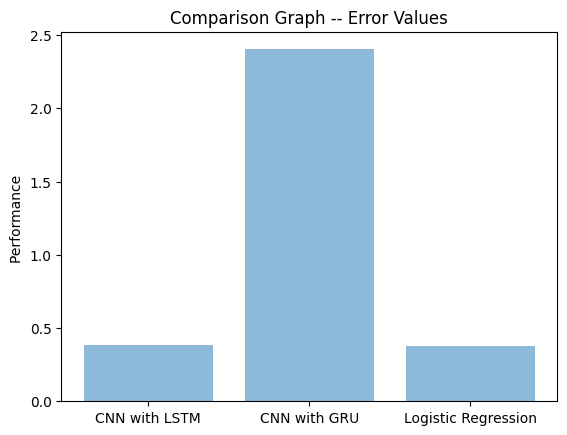

In [ ]:
#=========================== PREDICTION =================================

      # ==== COMPARISON GRAPH =====
print()
print("Error Value Must Be Low")
print()
objects = ('CNN with LSTM', 'CNN with GRU', 'Logistic Regression')
y_pos = np.arange(len(objects))
performance = [mae_lstm,mae_gru,mae_lr]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Performance ')
plt.title('Comparison Graph -- Error Values')
plt.show()
